# ICESat-2 Hackweek 2020: Machine Learning

#### Yara Mohajerani ([ymohajer@uci.edu](mailto:ymohajer@uci.edu))

**Note** Before going through this tutorial, make sure you have the correction environment by running

`conda create --name <env> --file mlenv.lock`
with the `mlenv.lock` file being in this repositoriy, and choose the this environment for your kernel.

---

In this tutorial we will explore the basics of machine learning with an emphasize on neural networks and applications in altimetry. First we will offer a brief introduction to theory and techniques in implementing neural networks, and then will focus on altimetry applications.

## Motivation
Advances in machine learning have made it a valuable tool for extracting insights from large datasets without the need for developing exact analytical algorithms. In particular, this has proven extremely useful for altimetry applications. For example, imagine you have thousands of satellite images and you want to identify paricular features automatically in the dataset. One way is to manually go through the data, which is not practical. The second way is to come up with an analytical algorithm that uses explicit engineered laws to detect the desired features. This is not very easy or robust, to say the least. But machine learning methods can learn to perform the desired task from the data in an approximate manner. Specifically, *supervised* methods use the data along with the desired outputs to accomplish the learning task. Here we will focus on supervised machine learning. An extremely useful subset of supervised machine learning fields is *neural networks*, which will be discussed in this notebook.

Given the shear volume of altimetry data from ICESat-2, the is huge potential in extracting insights from the data with machine learning that were not possible before. Keep in mind that machine learning is a big field and here we focus on only a few specific approaches and a few computational tools. Specifically, we will focus on neural networks largely implemented in `keras`.

---
Introduction to neural networks
---

Neural networks use a series of nonlinear transformations with adjustable (trainable) parameters to approximate an input field into a desired output.

Each 'cell' or unit of a network has an associated weight $w$ and bias $b$, and an activation function $f(z)$ for applying a nonlinear transformation such that the output is

$$
\begin{aligned}
 f(w.x + b)
\end{aligned}
$$

for input $x$.

Some examples of activation functions are 
Sigmoid:

$$
\begin{aligned}
 f(z) = \frac{1}{1+e^{-z}}
\end{aligned}
$$

Rectified Linear Unit (ReLU):

$$
\begin{aligned}
 f(z) = \max(0,z)
\end{aligned}
$$

And many others, which is beyond the scope of this brief tutorial. There are many excellent resources on the choice activation functions (e.g. [Neural Networks and Deep Learning by Michael Nielson](http://neuralnetworksanddeeplearning.com/chap3.html))


A neural network contains many layers of nodes to accomplish more involved transformations. Note that each unit only has one adjustable bias $b$, but each precedening connected note has a weight $w$ associated with it. All the weighted inputs are summed such that the output is

$$
\begin{aligned}
 f(b+\sum_{i} w_ix_i)
\end{aligned}
$$


![Neural network generic example fromw ww.astroml.org](https://www.astroml.org/_images/fig_neural_network_1.png)
<sub>Schematic from [AstroML](www.astroml.org)</sub>

Packages like PyTorch and TensforFlow provide the tools to contruct neural networks in Python. However, here we focus on Keras, a higher-level package which makes it easier to contruct a network.

Here as an example we will contruct a simple model for the quintessential machine learning example of identifying handwritten digits (MNIST dataset).

#### 1) Get data and develop neural network

In [1]:
#--  import required packages
import keras
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#-- Get built-in MNIST data from keras
#-- "Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.""
#-- https://keras.io/datasets/#mnist-database-of-handwritten-digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


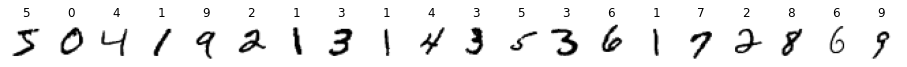

In [3]:
fig, ax = plt.subplots(1, 20, figsize=(16,5))
for i in range(20):
    ax[i].imshow(x_train[i],cmap='binary')
    ax[i].set_title(y_train[i])
    ax[i].axis('off')
plt.show()

In [4]:
#-- Turn the trainign labels (indicating which number each image is), into one-hot encoding
#-- e.g. 3 --> [0,0,0,1,0,0,0,0,0,0]
onehot_train = keras.utils.to_categorical(y_train, num_classes=10)

In [5]:
#-- Make sequential model
model = keras.Sequential()
#-- "Dense implements the operation: output = activation(dot(input, kernel) + bias)"
#-- https://keras.io/layers/core/
#-- first hidden layer has 64 units, and input is 28*28 which is the flattened input data
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]*x_train.shape[2]))
model.add(Dense(32, activation='relu', input_dim=32))
model.add(Dense(10, activation='softmax'))

This is categorical classification with 10 classes (0-9), hence 10 units in the last layer. We compile the model with a `categorical_crossentropy` loss function used to train the model.

In [6]:
model.compile(optimizer='adam',     # optimization algorithm used (other examples include scholastic gradient descent, etc)
              loss='categorical_crossentropy',
              metrics=['accuracy']) # quantity to be minimized

In [7]:
#-- Train model (20 epochs, with batch sizes of 32)
#-- batch size is number if data points used in each training iteration
#-- epoch is total number of times the whole dataset is used.
#-- so total number of iterations is total_size/batch_size * epochs
model.fit(x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]),
          onehot_train, epochs=20, batch_size=32)

Epoch 1/20
60000/60000 [==============================] - 17s 290us/step - loss: 1.5492 - accuracy: 0.7158
Epoch 2/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.4349 - accuracy: 0.8838 17s - loss: 0.5262 - accuracy: 0.8 -
Epoch 3/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.2679 - accuracy: 0.9276s - loss:
Epoch 4/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.2025 - accuracy: 0.9445
Epoch 5/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.1761 - accuracy: 0.9520s - los -
Epoch 6/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1507 - accuracy: 0.9586
Epoch 7/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.1403 - accuracy: 0.9616s - los - ETA
Epoch 8/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.1247 - accuracy: 0.9667
Epoch 9/20
60000/60000 [==============================] - 17s 277us/step - l

#### 2) Evaluate model

In [8]:
#-- turn testing labels to one-hot encoded
onehot_test = keras.utils.to_categorical(y_test, num_classes=10)
#-- evaluate performance of model
#-- Returns the loss value & metrics value, which in this case is accuracy
model.evaluate(x=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]),
               y=onehot_test, verbose=1)

10000/10000 [==============================] - 2s 171us/step - E


[0.1555674942055717, 0.9688000082969666]

With this simple 4-layer model with get $~97\%$ accuracy!

---
# Breakout Exercise: Regression
---
Before breaking into groups, we will do the set up of the problem together.

The goal is to now do a regerssion problem. You will have to figure out a way to alter the architecture of the neural network to provide an output that is not a set of classifications, but a regression parameter.

First we will create simulated ATL03 data by creating a noisy dataset of a series of patches with linear features and Gaussian noise.

---
Convolutional Neural Networks
---
A class of neural networks that is extremely useful in remote-sensing applications is the Convolutional Neural Network (CNN). CNNs use a set of kernels that convolve over input matrices (hence the name). 
![CNN animation from the Stanford Deep Learning Tutorial](http://ufldl.stanford.edu/tutorial/images/Convolution_schematic.gif)
<sub>Animation from the Stanford Deep Learning Tutorial [Link](http://ufldl.stanford.edu/tutorial/)</sub>

You can image this as a set small matrices (filters) sliding over a larger matrix (input) to detect certain features.

![CNN schematic from Colah's blog](https://colah.github.io/posts/2014-07-Understanding-Convolutions/img/Conv-9-Conv2-XY.png)
<sub>Schematic from Colah's blog - [Understanding Convolutions](https://colah.github.io/posts/2014-07-Understanding-Convolutions/)</sub>

A kernel is convolved over the image to extract features at increasingly abstract levels. Kernel weights (W, b) updated through training to learn desired features.

$$
\begin{aligned}
 y_0 = \sigma(W_0x_0 + W_1x_1 - b)\\
 y_1 = \sigma(W_0x_1 + W_1x_2 - b)
\end{aligned}
$$

Note that the weights and bias are a property of the kernel, and the input x changes as it convolves over the image.

Implemeting convolutional layers in `keras` is very easy. There are different types of convolutions that are beyond the scope of this tutorial, but here we will just focus on a simple 2D convolution that can be implemented with the `conv2D()` function:

In [9]:
import keras.layers as kl

In [12]:
kl.Conv2D?

Init signature:
kl.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers, does not include the batch axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`.

#

The first argument, `filters` refers to the number of filters that will be convolved over the input image. The second argument, `kernel_size` refers to the size dimensions of each filter. `stide` and `padding` determine the spacing of the convolutional kernel as it moves across the input, and padding determines the output of the layer. `same` padding forces the output to be the same dimensions as the input by adding zeros to the boundaries, while `valid` allows the layer to naturally reduce in size due to convolution (as shown in the animation above). For example, if a convolutional layer is given a $10\times10\times1$ input with 32 filters with kernel size $3\times3$, stride $1\times1$, and `valid` padding, the output will have dimensions $8\times8\times32$. Check this for yourself. What if we change the input to $12\times12\times3$ with stride $2\times2$?

*Hint:* I recommend reading through [this document](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215) to better understand convolutions.

Before we go over a real-world example, we also need to explore the concept of *pooling* layers. 

Pooling refers to combining nearby grid cells (through either averaging, picking the maximum value, or other methods). This operation provides additional dimensionality reduction, as well as locational invariance, since the exact location of the desired features in the group of cells being combined does not matter. The most common type of pooling is max-pooling, since we care about the highest value in a group referring to the desired features. This can be accomplished by the MaxPooling2D() function:

In [13]:
kl.MaxPooling2D?

Init signature:
kl.MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Docstring:     
Max pooling operation for spatial data.

# Arguments
    pool_size: integer or tuple of 2 integers,
        factors by which to downscale (vertical, horizontal).
        (2, 2) will halve the input in both spatial dimension.
        If only one integer is specified, the same window length
        will be used for both dimensions.
    strides: Integer, tuple of 2 integers, or None.
        Strides values.
        If None, it will default to `pool_size`.
    padding: One of `"valid"` or `"same"` (case-insensitive).
    data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, height, width, channels)` while `channels_first`
        corresponds to inputs with shape
        `(batch, channels,

The size of the pooling matrix is given by the `pool_size` argument. The `strides` and `padding` options are the same as the convolution function.

Lastly, we also briefly discuss regularization. We do not want to rely on a few connections in the network to perform the desired task, which does not easily generalize to a variety of inputs. In order to increase robustness, we introduce a regularization method called *Dropout* to randomly eliminate a subset of neurons in each iteration in training. This can be called by the Keras `Dropout()` function:

In [14]:
kl.Dropout?

Init signature: kl.Dropout(rate, noise_shape=None, seed=None, **kwargs)
Docstring:     
Applies Dropout to the input.

Dropout consists in randomly setting
a fraction `rate` of input units to 0 at each update during training time,
which helps prevent overfitting.

# Arguments
    rate: float between 0 and 1. Fraction of the input units to drop.
    noise_shape: 1D integer tensor representing the shape of the
        binary dropout mask that will be multiplied with the input.
        For instance, if your inputs have shape
        `(batch_size, timesteps, features)` and
        you want the dropout mask to be the same for all timesteps,
        you can use `noise_shape=(batch_size, 1, features)`.
    seed: A Python integer to use as random seed.

# References
    - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
       http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
File:           /srv/conda/envs/ML/lib/python3.7/site-packages/keras/layers/core

The first argument, `rate` is the ratio of dropped neurons, which should be between 0 and 1.

Now we revisit the MNIST problem from above, but using convolutional nets. 

Note that `conv2D` also requires the number of input channels. In the case of our gray-scale images here, there is only one input channel. We reshape our inputs accordingly:

In [15]:
#-- add new axis for channels. There is only 1 channel in our case
#-- We also convert the input images from 0-255 integer pixels to 0-1 floats
x_train = x_train[...,np.newaxis].astype('float')/255
x_test = x_test[...,np.newaxis].astype('float')/255
#-- check new shape
x_train.shape

(60000, 28, 28, 1)

In [16]:
#-- as before, we want to use teh one-hot vectors here. We have already one this above,
#-- but you can run this cell again if you do not have it in the memory
#-- Turn the trainign labels (indicating which number each image is), into one-hot encoding
#-- e.g. 3 --> [0,0,0,1,0,0,0,0,0,0]
onehot_train = keras.utils.to_categorical(y_train, num_classes=10)
onehot_test = keras.utils.to_categorical(y_test, num_classes=10)

Now that the setup is complete, we create the convolutional net:

In [17]:
model = keras.Sequential()
#-- add a 2D convolution with 32 output channels and kernel size (3x3)
#-- We yse the ReLU activation function
#-- input shape refers to the shape of each image being passed in, so we 
#-- ignore the first dimension referring to the total number of images
model.add(kl.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
#-- Now we add a second layer with 64 output channels
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
#-- Now we add a max-pooling layer
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
#-- We now add regularization with Dropout ratio 2
model.add(kl.Dropout(0.2))

Note the default padding of Conv2D is `valid`. So the first layer will reduce the output from $28\times28$ to $26\times26$, and the second layer will lower to $24\times24$. The max-pooling layer will get the maximum of every $2\times2$ group of cells. Therefore, the pooling layer will further reduce the dimensions to $12\times12$. In order to classify these images, we need to turn them into a flattened array. At the end, every element of this flattened array needs to be connected to every output cell such that all the information can be used to classify the given image. All classification networks have this final *Dense* layer, which simply means all the elements of the previous layer are simultaneously connected to each of the final units (which is not the case for convolutional layers). The flattened and dense layers are added below:

In [18]:
#-- flatten the last convolutional layer to a 1-dimensional array
model.add(kl.Flatten())
#-- Add a dense layer with the same number of output cells as the number of classes, such that each
#-- cell represents the probability of belonging to the corresponding class.
#-- The activation function is "softmax"
model.add(kl.Dense(10, activation='softmax'))

Note that the activation function for the Dense layer is Softmax. Softmax is a normalized exponential function that returns normalized probabilities using

$$
\begin{aligned}
 \sigma(z_i) = \frac{e^{z_i}}{\sum_{j}e^{z_j}}
\end{aligned}
$$

where $z_i$ is given by $\sum_j w_{ji}x_j + b_i$.

Thus, we can interpret the results of the neural network as the probability for each of the 10 classes given by each of the 10 output units.

---
Next, we need to compile the model with the desired loss function used in training. Loss functions are beyond the scope of this short tutorial, but we use the *categorical crossentropy* loss as before:

In [19]:
model.compile(optimizer='adam',     # optimization algorithm used (other examples include scholastic gradient descent, etc)
              loss='categorical_crossentropy',
              metrics=['accuracy']) # quantity to be minimized

We can visualize the model so far using the `plot_model()` function. Make sure you have `pydot` installed for the model to be plotted.

In [20]:
from keras.utils import plot_model

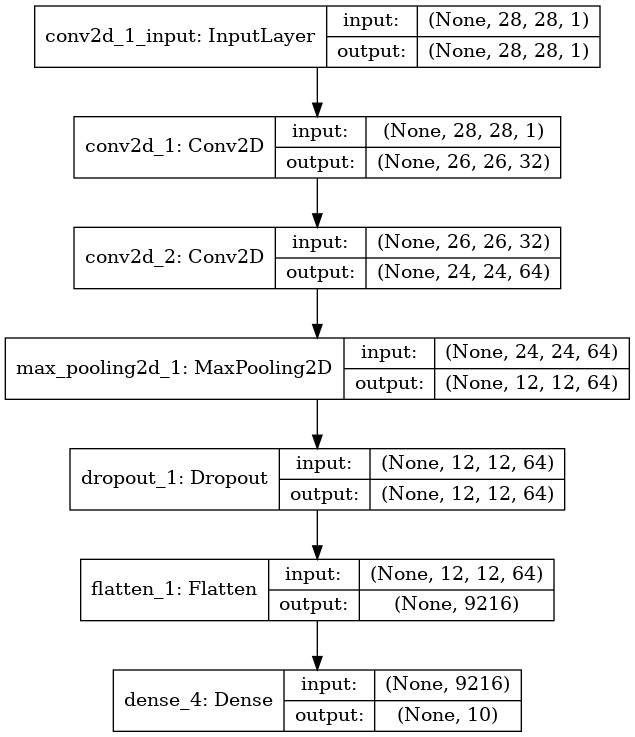

In [21]:
plot_model(model,show_shapes=True)

Now we can train the model. You will notice that training convolutional nets is computationally more expensive ($\sim80 s$ per epoch), but it can perform much better and in fact converges very fast. In just 5 epochs we can get better performance than the previous model on the same data above.  

In [22]:
model.fit(x_train, onehot_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 200s 3ms/step - loss: 0.1383 - accuracy: 0.9578
Epoch 2/5
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0521 - accuracy: 0.9841
Epoch 3/5
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0383 - accuracy: 0.9880
Epoch 4/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0290 - accuracy: 0.9907
Epoch 5/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0233 - accuracy: 0.9929


Now that the model is trained, we can use the `evaluate` function to assess the performance.

In [12]:
model.evaluate(x=x_test, y=onehot_test, verbose=1)

10000/10000 [==============================] - 2s 209us/step


[0.03896512659455184, 0.9879999756813049]

We get an accuracy of $\sim99\%$!

Note that we have to be careful with overfitting. We only trained the network for 5 epochs here, but excessive training will result in overfitting and reduction in the generalizability of the model. There are more formal steps you can take to avoid overfitting, but that is beyond the scope of this tutorial.

---
# Breakout Exercise (with altimetry connection)
---